In [2]:
%%html
<style>
.code_cell .run_this_cell {
    display: none;
}
</style>

After meeting on Tuesday 12 May 2020:

This code v6 is an attempt in applying Filter Bank Common Spatial Pattern (FBCSP)  
References:  
* Filter Bank Common Spatial Pattern Algorithm on BCI Competition IV Datasets 2a and 2b
	doi: 10.3389/fnins.2012.00039
* Filter Bank Common Spatial Pattern (FBCSP) in Brain-Computer Interface
    doi: 10.1109/IJCNN.2008.4634130

In [2]:
%autosave 5

Autosaving every 5 seconds


In addition to that the overlapping data will be performed before CSP calculation
The amount of overlapping performed on the data are:
1. 10%
2. 50%
3. 90%


# BCI Competition IV Dataset 2a (.npz data)
<p>
Information Given in Documentation

From the documentation it is known that:
<li>25 electrodes are used, first 22 are EEG, last 3 are EOG
<li>Sampling frequency (fs) is 250Hz
<li>9 subjects
<li>9 run (run 1-3 are for eye movement, run 4-9 is MI)

<b> -- Time Duration-- </b>

1 trials                          = 7-8s  
1 run              = 48 trials    = 336-384s  
1 session = 6 runs = 288 trials   = 2016-2304s

About the recording of eye movement
<li>run 1 => 2 mins with eyes open
<li>run 2 => 1 min with eyes closed
<li>run 3 => 1 min with eye movements

## Visualizing/ Preparing the Data 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as io
import pandas as pd
from pandas import DataFrame as dframe

In [3]:
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [4]:
# np.set_printoptions(precision=30, suppress=True)

In [4]:
# number of subject
ns = 9

In [5]:
# Load the training data of subject 01
data01 = np.load('./datasets/A01T.npz')
data02 = np.load('./datasets/A02T.npz')
data03 = np.load('./datasets/A03T.npz')
data04 = np.load('./datasets/A04T.npz')
data05 = np.load('./datasets/A05T.npz')
data06 = np.load('./datasets/A06T.npz')
data07 = np.load('./datasets/A07T.npz')
data08 = np.load('./datasets/A08T.npz')
data09 = np.load('./datasets/A09T.npz')

In [6]:
type(data01)

numpy.lib.npyio.NpzFile

In [7]:
# Keys available inside data are
data01.files

['s', 'etyp', 'epos', 'edur', 'artifacts']

In [9]:
data09['artifacts'].shape # Containing artifacts occurent in each event in all runs of a subject

(288, 1)

In [11]:
dframe(data09['artifacts'])

,0
0,1
1,0
2,0
3,1
4,1
...,...
283,0
284,0
285,0
286,0


In [8]:
# Create table with three columns of 'etyp', 'epos', 'edur' respectively
# Name this table property
prop01 = np.c_[data01['etyp'], data01['epos'], data01['edur']]
prop02 = np.c_[data02['etyp'], data02['epos'], data02['edur']]
prop03 = np.c_[data03['etyp'], data03['epos'], data03['edur']]
prop04 = np.c_[data04['etyp'], data04['epos'], data04['edur']]
prop05 = np.c_[data05['etyp'], data05['epos'], data05['edur']]
prop06 = np.c_[data06['etyp'], data06['epos'], data06['edur']]
prop07 = np.c_[data07['etyp'], data07['epos'], data07['edur']]
prop08 = np.c_[data08['etyp'], data08['epos'], data08['edur']]
prop09 = np.c_[data09['etyp'], data09['epos'], data09['edur']]

In [9]:
prop01.shape

(603, 3)

In [12]:
pd.__version__

'1.0.3'

In [13]:
pd.options.display.max_rows = None

In [14]:
dframe(prop02, columns=['etype', 'epos','edur'])

,etype,epos,edur
0,32766,1,0
1,276,1,31512
2,32766,31514,0
3,277,31514,26088
4,32766,57603,0
5,1072,57603,38556
6,32766,96160,0
7,768,96510,1875
8,769,97010,313
9,768,98513,1875


In [10]:
# Store all 's' data into sample_data
sample_data01 = dframe(data01['s'])
sample_data02 = dframe(data02['s'])
sample_data03 = dframe(data03['s'])
sample_data04 = dframe(data04['s'])
sample_data05 = dframe(data05['s'])
sample_data06 = dframe(data06['s'])
sample_data07 = dframe(data07['s'])
sample_data08 = dframe(data08['s'])
sample_data09 = dframe(data09['s'])

In [11]:
# Remove the last 3 electrodes (EOG electrodes)
sample_data01 = sample_data01.iloc[:, 0:22]
sample_data02 = sample_data02.iloc[:, 0:22]
sample_data03 = sample_data03.iloc[:, 0:22]
sample_data04 = sample_data04.iloc[:, 0:22]
sample_data05 = sample_data05.iloc[:, 0:22]
sample_data06 = sample_data06.iloc[:, 0:22]
sample_data07 = sample_data07.iloc[:, 0:22]
sample_data08 = sample_data08.iloc[:, 0:22]
sample_data09 = sample_data09.iloc[:, 0:22]

In [12]:
sample_data01.shape

(672528, 22)

In [13]:
# Showing inital value of sample_data
sample_data01.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,-21.142578,-23.681641,-21.484375,-25.146484,-25.732422,-27.929688,-14.550781,-22.509766,-25.439453,-28.710938,...,-26.074219,-23.144531,-24.804688,-30.615234,-29.638672,-26.660156,-20.947266,-25.439453,-24.902344,-19.677734
1,-21.923828,-23.925781,-24.316406,-25.341797,-26.074219,-25.244141,-16.064453,-22.753906,-28.320312,-29.248047,...,-23.632812,-23.486328,-26.708984,-31.054688,-30.712891,-26.123047,-22.998047,-27.099609,-26.367188,-23.339844
2,-15.625000,-19.726562,-18.847656,-21.582031,-20.751953,-21.728516,-12.451172,-20.410156,-23.730469,-25.927734,...,-16.845703,-22.070312,-23.828125,-28.759766,-28.417969,-24.462891,-21.386719,-25.097656,-24.267578,-21.484375
3,-16.699219,-13.720703,-20.361328,-20.849609,-24.169922,-22.021484,-10.986328,-16.357422,-25.585938,-24.951172,...,-22.998047,-17.675781,-24.951172,-27.783203,-28.857422,-25.537109,-19.335938,-24.316406,-24.511719,-17.919922
4,-19.335938,-17.626953,-20.410156,-26.464844,-27.392578,-29.882812,-9.277344,-18.359375,-24.609375,-30.517578,...,-32.617188,-18.701172,-24.609375,-31.884766,-33.740234,-32.666016,-18.554688,-26.611328,-28.466797,-18.408203


In [14]:
# Sample data has shape of 67k~ samples
# This samples belong to total of all 9 runs with 48 trials of 4 different classes
for i in range(1, 10):
    var = 'sample_data0' + str(i)
    print(var, globals()[var].shape)

sample_data01 (672528, 22)
sample_data02 (677169, 22)
sample_data03 (660530, 22)
sample_data04 (600915, 22)
sample_data05 (686120, 22)
sample_data06 (678980, 22)
sample_data07 (681071, 22)
sample_data08 (675270, 22)
sample_data09 (673328, 22)


## Remove Artifact
Inside data of each subject exists a 'artifacts' data which contains the information on each trial whether the data is clean, denoted by `0` or containing artifact, denoted by `1`

In [40]:
# # Append the artifacts column to all events data, shape 288 x 4
# new_prop = np.hstack([all_ev, data['artifacts']])

In [ ]:
# def removeArtifacts(prop, data):
#     # From prop take all data corresponds to event 769, 770, 771, 772
#     idx = np.asarray(np.where((prop[:, 0]>768) & (prop[:, 0]<773))).flatten()
#     all_ev = prop[idx, :]

#     # Append the artifacts column to all events data, shape 288 x 4
#     new_prop = np.hstack([all_ev, data['artifacts']])

#     # Find index of clean data from all_ev with classes 769 (left) or 770 (right) and artifacts equal to '1'
#     idx_cl = np.argwhere(((new_prop[:, 0]==769) | (new_prop[:, 0]==770)) & (new_prop[:, 3]==0)).flatten()
#     clean_ev = new_prop[idx_cl, :]

#     return clean_ev

In [ ]:
# # Remove artifacts and take only event 769 (left) and 770 (right)
# clean_ev01 = removeArtifacts(prop01, data01)
# clean_ev02 = removeArtifacts(prop02, data02)
# clean_ev03 = removeArtifacts(prop03, data03)
# clean_ev04 = removeArtifacts(prop04, data04)
# clean_ev05 = removeArtifacts(prop05, data05)
# clean_ev06 = removeArtifacts(prop06, data06)
# clean_ev07 = removeArtifacts(prop07, data07)
# clean_ev08 = removeArtifacts(prop08, data08)
# clean_ev09 = removeArtifacts(prop09, data09)

In [ ]:
# dframe(clean_ev07)

In [ ]:
# # Fetch indexes whose 1st column are 769 (left) and 770 (right)
# # Subject 1 - 9
# for i in range(1, 10):
#     idx_l = 'idx0' + str(i) + '_l'
#     idx_r = 'idx0' + str(i) + '_r'
#     clean_ev = globals()['clean_ev0' + str(i)]
#     globals()[idx_l] = np.argwhere(clean_ev[:, 0]==769).flatten()
#     globals()[idx_r] = np.argwhere(clean_ev[:, 0]==770).flatten()

In [ ]:
idx01_r

In [ ]:
# # Fetch positions of corresponding event types
# # Subject 01-09
# for i in range(1, 10):
#     pos_l = 'pos0' + str(i) + '_l'
#     pos_r = 'pos0' + str(i) + '_r'
#     clean_ev = globals()['clean_ev0' + str(i)]
#     idx_l = globals()['idx0' + str(i) + '_l']
#     idx_r = globals()['idx0' + str(i) + '_r']

#     globals()[pos_l] = clean_ev[idx_l, 1]
#     globals()[pos_r] = clean_ev[idx_r, 1]

In [ ]:
# # Duration of both events lasted for 313 samples, we can defined dur as
# cue_dur = 313

In [ ]:
# idx02_l.shape

## Without artifacts removal

According to the documentation we are interested to grab event type of 769, left class and 770, right class

With each type has duration of 313 samples

In [15]:
# Fetch indexes whose 1st column are 769 (left) and 770 (right)
# Subject 1 - 9
for i in range(1, 10):
    idx_l = 'idx0' + str(i) + '_l'
    idx_r = 'idx0' + str(i) + '_r'
    prop = globals()['prop0' + str(i)]
    globals()[idx_l] = np.argwhere(prop[:, 0]==769).flatten()
    globals()[idx_r] = np.argwhere(prop[:, 0]==770).flatten()

In [16]:
idx09_l.shape, idx09_r.shape

((72,), (72,))

In [17]:
dframe(idx05_l).tail()

,0
67,585
68,587
69,589
70,591
71,611


In [18]:
# Fetch positions of corresponding event types
# Now this array contains index on which an event begins
# Subject 01-09
for i in range(1, 10):
    pos_l = 'pos0' + str(i) + '_l'
    pos_r = 'pos0' + str(i) + '_r'
    prop = globals()['prop0' + str(i)]
    idx_l = globals()['idx0' + str(i) + '_l']
    idx_r = globals()['idx0' + str(i) + '_r']

    globals()[pos_l] = prop[idx_l, 1]
    globals()[pos_r] = prop[idx_r, 1]

In [19]:
pos09_l.shape, pos09_r.shape

((72,), (72,))

In [20]:
dframe(pos04_r)

,0
0,38644
1,46361
2,48328
3,50448
4,58624
...,...
67,562915
68,571276
69,577403
70,579375


In [21]:
# Grab the duration of each event
# Subject 01-09
for i in range(1, 10):
    dur_l = 'dur0' + str(i) + '_l'
    dur_r = 'dur0' + str(i) + '_r'
    prop = globals()['prop0' + str(i)]
    idx_l = globals()['idx0' + str(i) + '_l']
    idx_r = globals()['idx0' + str(i) + '_r']
    
    globals()[dur_l] = prop[idx_l, 2]
    globals()[dur_r] = prop[idx_r, 2]    

In [22]:
dur01_l

array([313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313,
       313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313,
       313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313,
       313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313,
       313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313,
       313, 313, 313, 313, 313, 313, 313])

In [23]:
# Duration of both events lasted for 313 samples, we can defined dur as
cue_dur = 313

Be aware that this duration is actually the duration of the cue, let's take a look at the event type table in datasheet
![event-type-table.png](./img/event-type-table.png)

The timing scheme of the paradigm suggest that the MI task last for about 2.75 since after the cue ends
![timing-scheme-paradigm.png](./img/timing-scheme-paradigm.png)

In [24]:
# The amount of sample to be clipped for 1 trial of left and right
sec = 2.75
fs = 250
mi_dur = round(sec * fs)
print('After the 313 samples cue, clip this amount of samples:', mi_dur)

After the 313 samples cue, clip this amount of samples: 688


## Fetch 688 samples of each event from sample_data, 72 trials each class

In [25]:
len(pos02_l)

72

In [26]:
# Fetch 688 samples of each event from sample_data
# Store them in E_left and E_right respectively, For convenience 'E' is used to imitate the variable used in paper
# Preparing the variables to store event samples of shape 72 x 688 x 22
# Subject 01-09
for i in range(1, ns+1):
    E_l = 'E0' + str(i) + '_left'
    E_r = 'E0' + str(i) + '_right'
    pos_l = globals()['pos0' + str(i) + '_l']
    pos_r = globals()['pos0' + str(i) + '_r']
    
    sample = globals()['sample_data0' + str(i)]
    
    globals()[E_l] = np.zeros([pos_l.shape[0], mi_dur, sample.shape[1]])
    globals()[E_r] = np.zeros([pos_r.shape[0], mi_dur, sample.shape[1]])

In [27]:
E04_left.shape, E04_right.shape

((72, 688, 22), (72, 688, 22))

In [28]:
pos04_r

array([ 38644,  46361,  48328,  50448,  58624,  62774,  74739,  76714,
        89144,  95200,  97163, 111090, 119594, 121512, 125472, 143196,
       157529, 165505, 167466, 173549, 177646, 181845, 193998, 198004,
       216429, 218347, 222307, 226335, 230316, 238087, 256444, 276588,
       280771, 282814, 286898, 290833, 315182, 321253, 327151, 338833,
       340953, 351199, 365244, 371316, 375515, 391674, 395642, 401595,
       413969, 423986, 437788, 452026, 456010, 462079, 478548, 482540,
       486428, 492477, 494596, 496502, 504931, 522819, 530536, 536631,
       546949, 554806, 556910, 562915, 571276, 577403, 579375, 597379])

In [29]:
dframe(prop05)

,0,1,2
0,32766,1,0
1,276,1,30138
2,32766,30140,0
3,277,30140,38220
4,32766,68361,0
...,...,...,...
609,771,680470,313
610,768,682084,1875
611,769,682584,313
612,768,684143,1875


In [30]:
# Now we are ready to take 688 samples of left and right
# Subject 01-09
for i in range(1, 10):
    E_l = globals()['E0' + str(i) + '_left']
    E_r = globals()['E0' + str(i) + '_right']
    
    sample = globals()['sample_data0' + str(i)]

    pos_l = globals()['pos0' + str(i) + '_l']
    pos_r = globals()['pos0' + str(i) + '_r']
    
    for j in range(E_l.shape[0]):
        E_l[j]=sample.iloc[pos_l[j]+cue_dur:pos_l[j]+cue_dur+mi_dur, :]
    for k in range(E_r.shape[0]):
        E_r[k]=sample.iloc[pos_r[k]+cue_dur:pos_r[k]+cue_dur+mi_dur, :]


In [31]:
# Creating columns for sample data
Xcol = []
for i in range(1, 23):
    if i < 11:
        Xcol.append('EEG0'+str(i))
    else:
        Xcol.append('EEG'+str(i))

In [32]:
E01_left.shape

(72, 688, 22)

In [33]:
dframe(E01_left[60], columns=Xcol)

,EEG01,EEG02,EEG03,EEG04,EEG05,EEG06,EEG07,EEG08,EEG09,EEG010,...,EEG13,EEG14,EEG15,EEG16,EEG17,EEG18,EEG19,EEG20,EEG21,EEG22
0,7.812500,4.687500,5.029297,9.619141,5.957031,5.712891,0.732422,1.074219,1.025391,2.294922,...,1.660156,-1.318359,-1.562500,-1.757812,0.732422,1.562500,-3.173828,-3.613281,-3.320312,-2.832031
1,-2.734375,-2.978516,-5.517578,2.685547,-4.248047,-1.220703,-4.589844,-5.712891,-9.472656,-4.882812,...,-5.126953,-6.152344,-9.912109,-8.300781,-6.445312,-4.882812,-10.546875,-9.765625,-8.251953,-7.031250
2,-2.343750,-4.980469,-5.712891,3.955078,-2.978516,-2.246094,-9.423828,-7.275391,-7.421875,-3.906250,...,-4.345703,-5.224609,-7.763672,-5.468750,-4.101562,-2.929688,-6.347656,-5.957031,-4.052734,-1.904297
3,3.369141,1.904297,2.294922,8.251953,3.076172,2.734375,1.757812,2.050781,0.781250,2.343750,...,-0.732422,4.541016,0.830078,1.562500,3.515625,3.662109,3.125000,3.759766,5.029297,9.277344
4,4.638672,5.419922,4.589844,8.984375,4.882812,4.443359,7.958984,6.005859,3.613281,5.029297,...,1.953125,8.105469,4.003906,3.662109,3.808594,4.199219,3.271484,3.320312,4.492188,5.859375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683,-17.138672,-11.132812,-18.847656,-20.605469,-19.287109,-16.845703,-7.470703,-11.816406,-16.357422,-16.015625,...,-11.523438,-11.181641,-13.378906,-11.914062,-12.500000,-10.253906,-6.738281,-8.203125,-8.203125,-4.541016
684,-4.052734,-0.927734,-4.736328,-9.130859,-3.271484,-3.857422,6.396484,0.195312,-0.976562,-3.222656,...,-0.244141,0.146484,1.855469,-1.513672,0.146484,1.367188,5.468750,3.955078,3.222656,5.957031
685,-13.671875,-13.183594,-15.429688,-16.796875,-10.595703,-10.107422,-8.105469,-11.962891,-12.353516,-11.572266,...,-11.669922,-12.744141,-10.449219,-10.693359,-10.205078,-8.691406,-8.740234,-8.447266,-7.714844,-6.982422
686,-9.228516,-5.761719,-9.033203,-10.205078,-5.371094,-4.833984,-0.341797,-5.664062,-5.517578,-5.566406,...,-5.566406,-5.810547,-3.710938,-5.468750,-3.076172,-2.832031,-1.416016,-2.294922,-2.636719,-1.025391


In [34]:
# First transform the dimension of array to N x T, i.e. electrodes x  samples
# Subject 01-09
for i in range(1, ns+1):
    E_l = globals()['E0' + str(i) + '_left']
    E_r = globals()['E0' + str(i) + '_right']
    
#     try this:
    E_l_var = 'E0' + str(i) + '_left'
    E_r_var = 'E0' + str(i) + '_right'

    
    if (E_l.shape[0] != 22 and E_r.shape[0] !=22 ):
        globals()[E_l_var] = np.transpose(E_l, (0, 2, 1))
        globals()[E_r_var] = np.transpose(E_r, (0, 2, 1))

In [35]:
E02_left.shape, E02_right.shape

((72, 22, 688), (72, 22, 688))

In [36]:
dframe(E09_left[50]).head()

,0,1,2,3,4,5,6,7,8,9,...,678,679,680,681,682,683,684,685,686,687
0,-44.921875,-11.035156,1.611328,38.574219,17.675781,-25.634766,0.683594,0.048828,-12.646484,16.699219,...,-25.732422,-20.166016,0.878906,-27.441406,-20.312500,2.294922,-7.275391,-10.205078,-5.419922,-10.595703
1,-42.675781,-14.648438,-4.492188,35.498047,8.837891,-23.779297,3.369141,-0.634766,-16.162109,9.960938,...,-24.707031,-18.115234,-2.099609,-24.316406,-9.033203,3.369141,-5.175781,-1.318359,-0.634766,-2.636719
2,-45.654297,-12.597656,0.683594,37.695312,17.089844,-25.244141,1.904297,0.976562,-12.548828,13.085938,...,-26.171875,-19.091797,1.367188,-20.849609,-10.791016,8.398438,-0.244141,-4.199219,1.318359,-0.976562
3,-41.796875,-12.304688,0.585938,39.892578,16.748047,-23.535156,4.345703,3.857422,-14.062500,14.453125,...,-20.068359,-15.136719,5.078125,-23.535156,-9.619141,6.738281,-2.783203,-4.003906,-2.441406,-4.541016
4,-45.166016,-16.455078,0.146484,36.035156,11.865234,-32.031250,-6.152344,-2.880859,-17.041016,13.134766,...,-15.673828,-11.035156,8.935547,-19.775391,-9.326172,10.058594,-2.099609,-9.277344,-6.835938,-9.375000


## Stage 1: Bandpass Filter using Chebyshev Type II filter
Band pass filter will be applied to the EEG data  
A total of 9 band-pass filters are used:
1. 4-8Hz
2. 8-12Hz
3. 12-16Hz
4. 16-20 Hz ...  9. 36-40 Hz

These band-pass ranges are used because they yield a stable frequency response and cover range of 4-40Hz

In [72]:
from scipy import signal

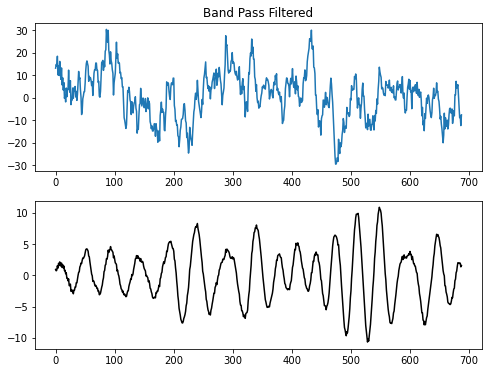

In [156]:
# Example of band-pass filtering with 4-8 frequency band
t = np.linspace(0, len(data), 688, False)
fig, ax = plt.subplots(2, 1, figsize=(8, 6))
# fig.suptitle('XX')

ax[0].plot(t, data)
ax[0].set_title('Original')
sos = signal.cheby2(12, 20, [4, 8], btype='bp', fs=250, output='sos')
filt = signal.sosfilt(sos, data)

ax[1].plot(t, filt, c='k')
ax[0].set_title('Band Pass Filtered')

plt.show()

In [154]:
filtered.shape

(688,)

In [179]:
# Now filter E_left and E_right to 9 portion of frequency bands
for i in range(1, ns+1):
    
    for j in range(E01_left.shape[0]):
    
        startb = 4
        stopb = 8
        inc = 4
        while(stopb < 41):
    
            E_left = globals()['E0' + str(i) + '_left']
            E_right = globals()['E0' + str(i) + '_right']

            filt_left = 'filt0' + str(i) + '_' + str(startb) + '_' + str(stopb) + '_left'
            filt_right = 'filt0' + str(i) + '_' + str(startb) + '_' + str(stopb) + '_right'

            sos_left = signal.cheby2(12, 20, [startb, stopb], btype='bp', fs=250, output='sos')
            sos_right = signal.cheby2(12, 20, [startb, stopb], btype='bp', fs=250, output='sos')

            globals()[filt_left] = signal.sosfilt(sos_left, E_left[j])
            globals()[filt_right] = signal.sosfilt(sos_right, E_right[j])

            startb += inc
            stopb += inc

In [182]:
dframe(filt01_8_12_left[0])

,0
0,-0.209541
1,0.032206
2,0.264652
3,0.331361
4,-0.066034
...,...
683,2.087413
684,1.382446
685,1.588349
686,0.821714


In [183]:
dframe(filt01_4_8_left[0])

,0
0,-0.209541
1,0.033742
2,0.266190
3,0.324344
4,-0.087049
...,...
683,-4.080980
684,-5.247475
685,-5.251402
686,-5.996865


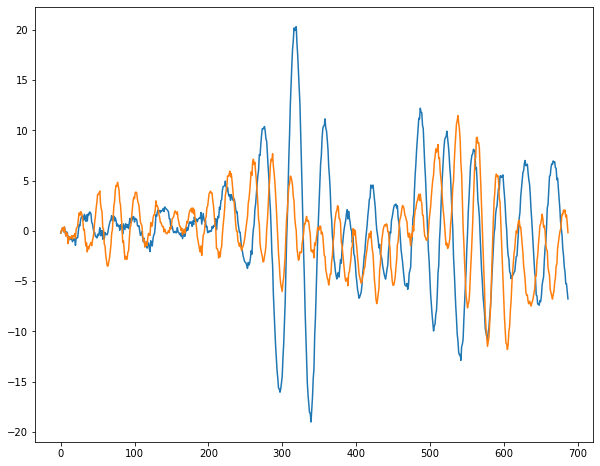

In [186]:
plt.figure(figsize=(10, 8))
plt.plot(filt01_4_8_left[0])
plt.plot(filt01_8_12_left[0])
plt.show()

In [150]:
# t = np.linspace(0, 1, 1000, False)
# sig = np.sin(2*np.pi*10*t) + np.sin(2*np.pi*20*t) + np.sin(2*np.pi*16*t) + + np.sin(2*np.pi*18*t)
# fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
# ax1.plot(t, sig)
# ax1.set_title('10 Hz and 20 Hz sinusoids')
# ax1.axis([0, 1, -3, 3])

# sos1 = signal.cheby2(0, 20, 16, 'lp', fs=1000, output='sos')
# sos2 = signal.cheby2(7, 20, 18, 'lp', fs=1000, output='sos')

# filtered1 = signal.sosfilt(sos1, sig)
# filtered2 = signal.sosfilt(sos2, sig)

# ax2.plot(t, filtered1)
# ax2.plot(t, filtered2)
# ax2.set_title('After 17 Hz high-pass filter')
# ax2.axis([0, 1, -2, 2])
# ax2.set_xlabel('Time [seconds]')
# plt.show()

In [103]:
dframe(filtered1)

,0
0,0.000000
1,0.401342
2,0.798004
3,1.185367
4,1.558933
...,...
995,-1.914383
996,-1.558933
997,-1.185367
998,-0.798004
